In [23]:
import os
import librosa
import librosa.display
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
SAMPLES_PER_SEC = 44100
import tensorflow_io as tfio


In [28]:
def create_spectrogram(file_path):
    audio_binary = tf.io.read_file(file_path)
    pcm = tfio.audio.decode_mp3(audio_binary)

    print('audio shape')
    print(audio.shape)
    spectrogram = tf.signal.stft(tf.transpose(audio), frame_length=256, frame_step=128)
    
    # spectrogram = tf.abs(spectrogram)
    # print(spectrogram.shape)
    # spectrogram = tf.expand_dims(spectrogram, axis=-1)
    # print(spectrogram.shape)
    # spectrogram = tf.squeeze(spectrogram, axis=[0,2])
    print(spectrogram.shape)

    return spectrogram

In [29]:
train_data_path = "initial phrases voiced"
test_data_path = "cross phrases voiced"

In [30]:
X_train, y_train = [], []
X_test, y_test = [], []

In [31]:
for filename in os.listdir(train_data_path):
    file_path = os.path.join(train_data_path, filename)
    
    file_path_to_display = file_path

    spectrogram = create_spectrogram(file_path)
    X_train.append(spectrogram)
    y_train.append(filename.replace('.wav',''))

NotImplementedError: unable to open file: libtensorflow_io.so, from paths: ['c:\\users\\sergeysaber\\pyver\\py392\\lib\\site-packages\\tensorflow_io\\python\\ops\\libtensorflow_io.so']
caused by: ['c:\\users\\sergeysaber\\pyver\\py392\\lib\\site-packages\\tensorflow_io\\python\\ops\\libtensorflow_io.so not found']

In [ ]:
spectrogram_to_display = create_spectrogram(file_path_to_display)
print(f"Размерность spectrogram_to_display перед логарифмированием: {spectrogram_to_display.numpy().shape}")


TypeError: Image data of dtype complex64 cannot be converted to float

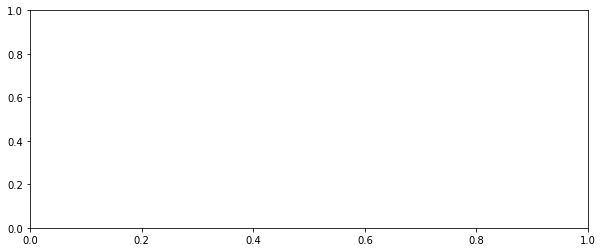

In [107]:
plt.figure(figsize=(10, 4))
plt.imshow(np.log1p(spectrogram_to_display.numpy()), aspect='auto', origin='lower', cmap='viridis')
plt.title('Спектрограмма')
plt.xlabel('Время')
plt.ylabel('Частота')
plt.colorbar(format='%+2.0f дБ')

In [2]:
initial_phrases_txt_path = 'initial_phrases.txt'
initial_phrases_mp3_folder_path = 'initial phrases voiced/'

In [3]:
initial_phrases_df = pd.DataFrame(columns=range(2))

In [4]:
initial_phrases_df.columns = ["file_name", "transcription"]

In [5]:
initial_phrases_df

,file_name,transcription


In [6]:
with open(initial_phrases_txt_path, 'r', encoding='utf-8') as file:
    initial_phrases_text = file.read().split('\n')

In [7]:
initial_phrases_files_path = [initial_phrases_mp3_folder_path + phrase + '.wav' for phrase in initial_phrases_text]

In [8]:
initial_phrases_df['transcription'] = initial_phrases_text
initial_phrases_df['file_name'] = initial_phrases_files_path

In [9]:
print(initial_phrases_df)

                                     file_name    transcription
0     initial phrases voiced/Красивая роза.wav    Красивая роза
1    initial phrases voiced/Свежая морковь.wav   Свежая морковь
2      initial phrases voiced/Яркая звезда.wav     Яркая звезда
3      initial phrases voiced/Нежная лилия.wav     Нежная лилия
4      initial phrases voiced/Теплая кофта.wav     Теплая кофта
5    initial phrases voiced/Мягкая подушка.wav   Мягкая подушка
6       initial phrases voiced/Чистая река.wav      Чистая река
7    initial phrases voiced/Быстрая лошадь.wav   Быстрая лошадь
8     initial phrases voiced/Зеленая трава.wav    Зеленая трава
9    initial phrases voiced/Спокойная река.wav   Спокойная река
10    initial phrases voiced/Крепкая чашка.wav    Крепкая чашка
11     initial phrases voiced/Высокая гора.wav     Высокая гора
12  initial phrases voiced/Уютная квартира.wav  Уютная квартира
13  initial phrases voiced/Светлая комната.wav  Светлая комната
14  initial phrases voiced/Прозрачная во

In [10]:
# An integer scalar Tensor. The window length in samples.
frame_length = 256
# An integer scalar Tensor. The number of samples to step.
frame_step = 160
# An integer scalar Tensor. The size of the FFT to apply.
# If not provided, uses the smallest power of 2 enclosing frame_length.
fft_length = 384

In [11]:
def encode_single_sample(mp3_file_path, label):
    ###########################################
    ##  Process the Audio
    ##########################################
    # 1. Read mp3 file
    file = tf.io.read_file(mp3_file_path)
    # 2. Decode the mp3 file
    audio, _ = tf.audio.decode_wav(file)
    audio = tf.squeeze(audio, axis=-1)
    # 3. Change type to float
    audio = tf.cast(audio, tf.float32)
    # 4. Get the spectrogram
    spectrogram = tf.signal.stft(
        audio, frame_length=frame_length, frame_step=frame_step, fft_length=fft_length
    )
    # 5. We only need the magnitude, which can be derived by applying tf.abs
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.math.pow(spectrogram, 0.5)
    # 6. normalisation
    means = tf.math.reduce_mean(spectrogram, 1, keepdims=True)
    stddevs = tf.math.reduce_std(spectrogram, 1, keepdims=True)
    spectrogram = (spectrogram - means) / (stddevs + 1e-10)
    ###########################################
    ##  Process the label
    ##########################################
    # 7. Convert label to Lower case
    label = tf.strings.lower(label)
    # 8. Split the label
    label = tf.strings.unicode_split(label, input_encoding="UTF-8")
    # 9. Map the characters in label to numbers
    print(label)
    # label = char_to_num(label)
    # 10. Return a dict as our model is expecting two inputs
    return spectrogram, label

In [22]:
train_dataset = tf.data.Dataset.from_tensor_slices(
    (list(initial_phrases_df["file_name"]), list(initial_phrases_df["transcription"]))
)

In [23]:
for ele in train_dataset: 
    print(ele) 

(<tf.Tensor: shape=(), dtype=string, numpy=b'initial phrases voiced/\xd0\x9a\xd1\x80\xd0\xb0\xd1\x81\xd0\xb8\xd0\xb2\xd0\xb0\xd1\x8f \xd1\x80\xd0\xbe\xd0\xb7\xd0\xb0.wav'>, <tf.Tensor: shape=(), dtype=string, numpy=b'\xd0\x9a\xd1\x80\xd0\xb0\xd1\x81\xd0\xb8\xd0\xb2\xd0\xb0\xd1\x8f \xd1\x80\xd0\xbe\xd0\xb7\xd0\xb0'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'initial phrases voiced/\xd0\xa1\xd0\xb2\xd0\xb5\xd0\xb6\xd0\xb0\xd1\x8f \xd0\xbc\xd0\xbe\xd1\x80\xd0\xba\xd0\xbe\xd0\xb2\xd1\x8c.wav'>, <tf.Tensor: shape=(), dtype=string, numpy=b'\xd0\xa1\xd0\xb2\xd0\xb5\xd0\xb6\xd0\xb0\xd1\x8f \xd0\xbc\xd0\xbe\xd1\x80\xd0\xba\xd0\xbe\xd0\xb2\xd1\x8c'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'initial phrases voiced/\xd0\xaf\xd1\x80\xd0\xba\xd0\xb0\xd1\x8f \xd0\xb7\xd0\xb2\xd0\xb5\xd0\xb7\xd0\xb4\xd0\xb0.wav'>, <tf.Tensor: shape=(), dtype=string, numpy=b'\xd0\xaf\xd1\x80\xd0\xba\xd0\xb0\xd1\x8f \xd0\xb7\xd0\xb2\xd0\xb5\xd0\xb7\xd0\xb4\xd0\xb0'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'i

In [13]:
batch_size = 32
train_dataset = (
    train_dataset.map(encode_single_sample, num_parallel_calls=tf.data.AUTOTUNE)
    .padded_batch(batch_size)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

Tensor("UnicodeSplit/UnicodeEncode/UnicodeEncode/UnicodeEncode:0", shape=(None,), dtype=string)


In [21]:
for ele in train_dataset: 
    print(ele) 



(<tf.Tensor: shape=(), dtype=string, numpy=b'initial phrases voiced/\xd0\x9a\xd1\x80\xd0\xb0\xd1\x81\xd0\xb8\xd0\xb2\xd0\xb0\xd1\x8f \xd1\x80\xd0\xbe\xd0\xb7\xd0\xb0.wav'>, <tf.Tensor: shape=(), dtype=string, numpy=b'\xd0\x9a\xd1\x80\xd0\xb0\xd1\x81\xd0\xb8\xd0\xb2\xd0\xb0\xd1\x8f \xd1\x80\xd0\xbe\xd0\xb7\xd0\xb0'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'initial phrases voiced/\xd0\xa1\xd0\xb2\xd0\xb5\xd0\xb6\xd0\xb0\xd1\x8f \xd0\xbc\xd0\xbe\xd1\x80\xd0\xba\xd0\xbe\xd0\xb2\xd1\x8c.wav'>, <tf.Tensor: shape=(), dtype=string, numpy=b'\xd0\xa1\xd0\xb2\xd0\xb5\xd0\xb6\xd0\xb0\xd1\x8f \xd0\xbc\xd0\xbe\xd1\x80\xd0\xba\xd0\xbe\xd0\xb2\xd1\x8c'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'initial phrases voiced/\xd0\xaf\xd1\x80\xd0\xba\xd0\xb0\xd1\x8f \xd0\xb7\xd0\xb2\xd0\xb5\xd0\xb7\xd0\xb4\xd0\xb0.wav'>, <tf.Tensor: shape=(), dtype=string, numpy=b'\xd0\xaf\xd1\x80\xd0\xba\xd0\xb0\xd1\x8f \xd0\xb7\xd0\xb2\xd0\xb5\xd0\xb7\xd0\xb4\xd0\xb0'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'i

In [15]:
fig = plt.figure(figsize=(8, 5))
for batch in train_dataset.take(1):
    spectrogram = batch[0][0].numpy()
    spectrogram = np.array([np.trim_zeros(x) for x in np.transpose(spectrogram)])
    label = batch[1][0]
    # Spectrogram
    label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
    ax = plt.subplot(2, 1, 1)
    ax.imshow(spectrogram, vmax=1)
    ax.set_title(label)
    ax.axis("off")
    # Wav
    file = tf.io.read_file(wavs_path + list(df_train["file_name"])[0] + ".wav")
    audio, _ = tf.audio.decode_wav(file)
    audio = audio.numpy()
    ax = plt.subplot(2, 1, 2)
    plt.plot(audio)
    ax.set_title("Signal Wave")
    ax.set_xlim(0, len(audio))
    display.display(display.Audio(np.transpose(audio), rate=16000))
plt.show()

InvalidArgumentError: Can not squeeze dim[1], expected a dimension of 1, got 2
	 [[{{node Squeeze}}]] [Op:IteratorGetNext]

<Figure size 576x360 with 0 Axes>